In [1]:
#Importing needed libraries and dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the loan.csv file
loan_data = pd.read_csv("loan.csv")

## Data understanding

In [3]:
#Looking into the data from csv file 
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Printing Shape of the dataframe
loan_data.shape

(39717, 111)

In [5]:
#Printing number of null values in each column
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Data Cleaning and Manipulation

In [6]:
#There are many columns will all null values so this drops the columns with all the null values
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
#Now we will drop all the columns which only has single values and not needed for analysis
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [8]:
#Now lets drop columns which doesn't contribute to our analysis.
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [9]:
loan_data.shape

(39717, 21)

In [10]:
#lets check the remanining columns
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [11]:
#Lets remove the customers whose loan is curretly active as it won't be useful for our analysis 
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [12]:
#Lets count the percentage of null values for all the remaining columns
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

##### Lets see how we can handle this Null Values emp_length column. As this is relevant column we won't drop this.

In [14]:
#Looking into the Mode of the emp_length column.
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

##### 10+ years is the mode for the data and it has significant number of occurence.
##### Also the percentage of the null values are low as well so we can replace the null values with Mode without significant impact to our analysis

In [15]:
#Assigning mode to null values of emp_length column
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [16]:
#As the null percentage for the revol_util is low lets drop all those row which has null values for revol_util
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

##### Standardize "revol_util" column 
* Convert the "revol_util" column, described as an object but containing continuous values, to a numeric data type and scale the values to have a mean of 0 and a standard deviation of 1 (Z-score standardization).

##### Standardize "int_rate" column
* Standardize the "int_rate" column using Z-score standardization or an appropriate method to make the interest rate values comparable..

##### Standardize "emp_length"
* Convert it to a numeric format (e.g., "< 1 year" to 0, "10+ years" to 10).



In [17]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [18]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [19]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [20]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


### Treating Outliers

#### Annual Income (annual_inc) Column

<Axes: >

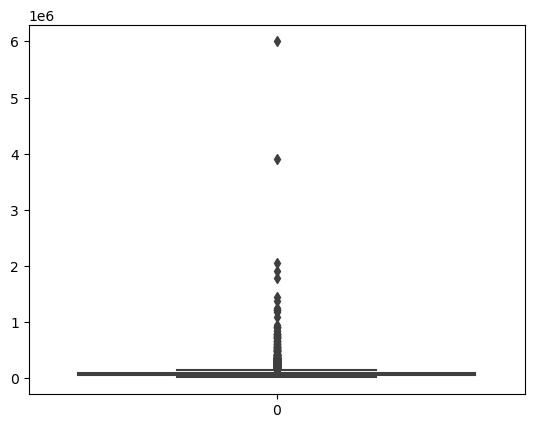

In [21]:
sns.boxplot(loan_data['annual_inc'])

In [22]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

* We detected that there are outliers in the 'annual_inc' column.
* We also observed that values beyond the 95th percentile were disconnected from the general distribution.
* We will use a threshold of 0.95 to identify and remove outliers in the next step.


In [23]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<Axes: >

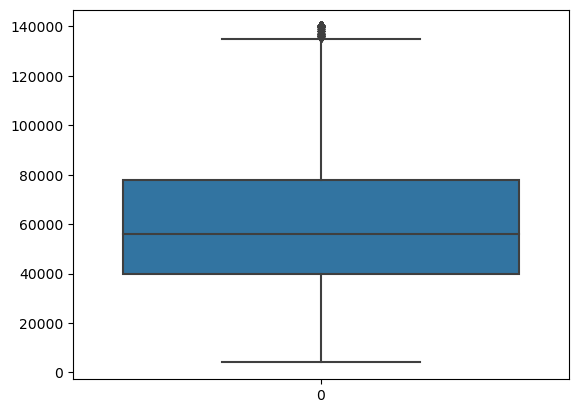

In [24]:
#Ploting boxplot for annual_inc column
sns.boxplot(loan_data.annual_inc)

* 'annual_inc' data has been successfully processed.
* Moving on to analyze potential outliers in other numerical variables: 'dti,' 'loan_amnt,' and 'funded_amnt_inv.'

<Axes: >

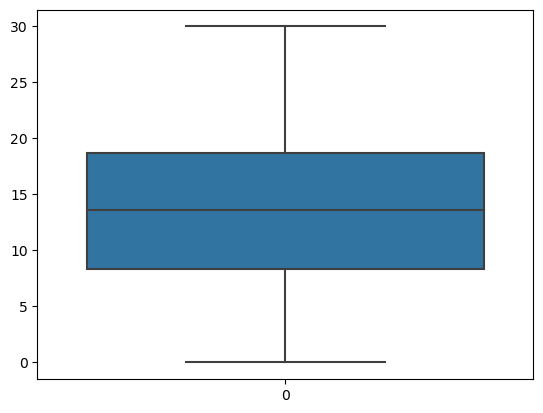

In [25]:
sns.boxplot(loan_data.dti)

<Axes: >

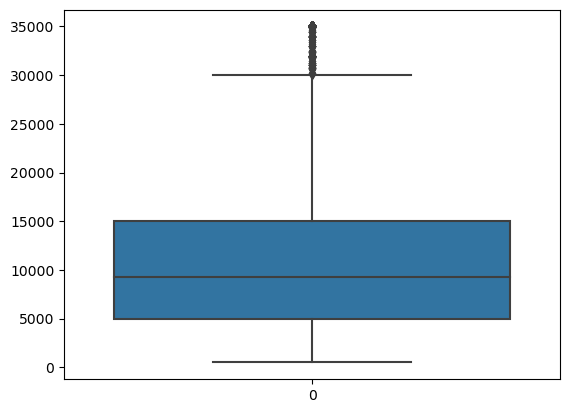

In [26]:
sns.boxplot(loan_data.loan_amnt)

In [27]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

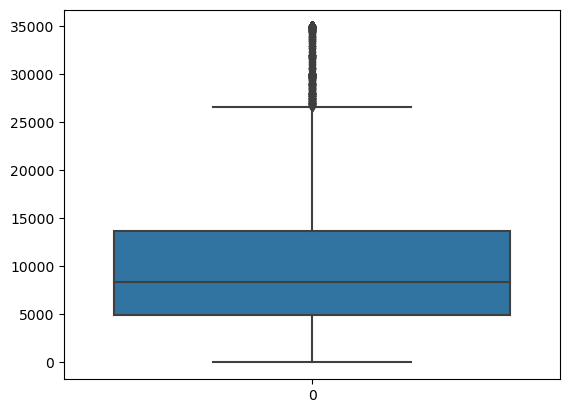

In [28]:
sns.boxplot(loan_data.funded_amnt_inv)

In [29]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

* Observing that while there are values distant from the distribution, the overall distribution for 'dti,' 'loan_amnt,' and 'funded_amnt_inv' is continuous.
* No need to remove outliers or extreme values for these columns.

## Data analysis

### Visualizing Categorical Data 
- Let's do the analysis on understanding how the distribution of loan amounts varies across different loan status categories, providing insights into loan performance and repayment outcomes.

<Axes: xlabel='loan_status', ylabel='count'>

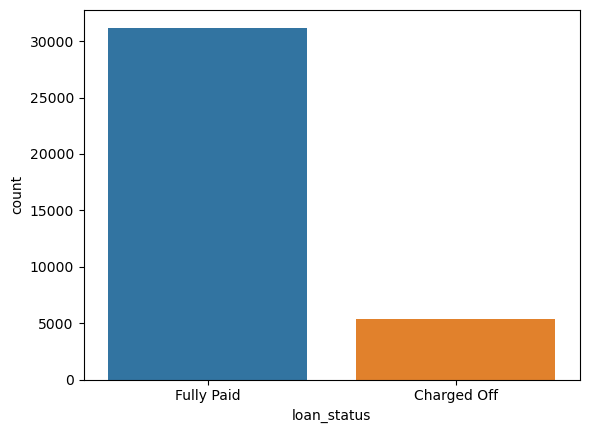

In [30]:
sns.countplot(x = 'loan_status', data = loan_data)

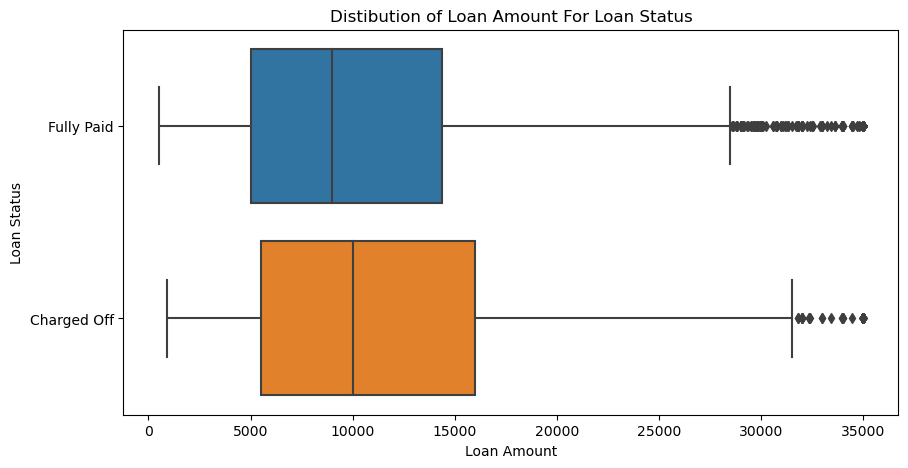

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

### Analysing Grade column with Total Count
* Utilizing the 'grade' column to extract the subgrade (integer level value) from the 'sub_grade' variable.
* Focusing our analysis and visualization on the 'Charged Off' loan_status subset.
* Preparing to create visualizations for the 'Charged Off' loan_status data.

In [32]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

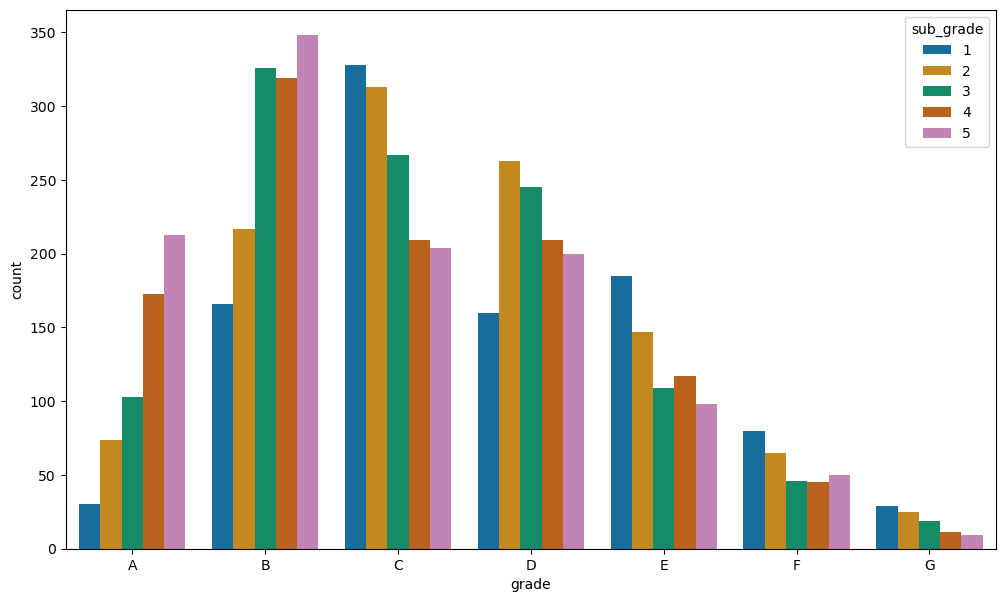

In [33]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

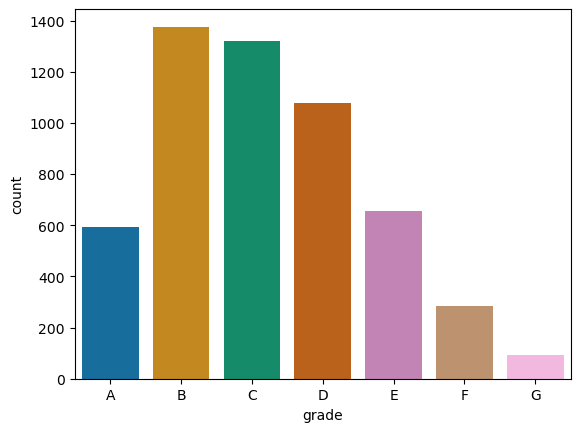

In [34]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Analyzing home_ownership

In [35]:
loan_data['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

* Noting that there are just three records with the 'NONE' value in the dataset.
* Deciding to replace these occurrences with 'OTHER' for consistency.

In [36]:
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [37]:
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

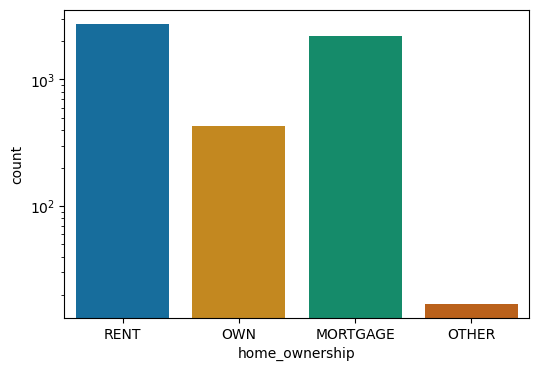

In [38]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analyzing purpose

<Axes: xlabel='count', ylabel='purpose'>

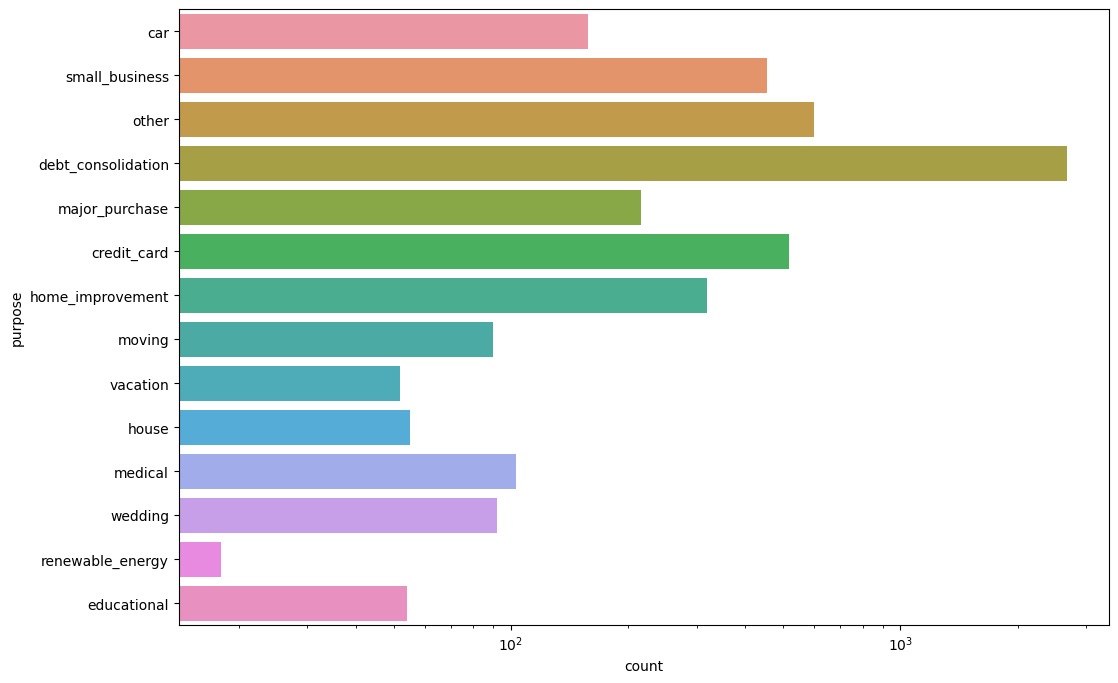

In [39]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])


##### Lets bin some numerical data into categories

In [40]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [41]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing interest rates in relation to the previously created interest rate bins.

<Axes: xlabel='emp_length', ylabel='count'>

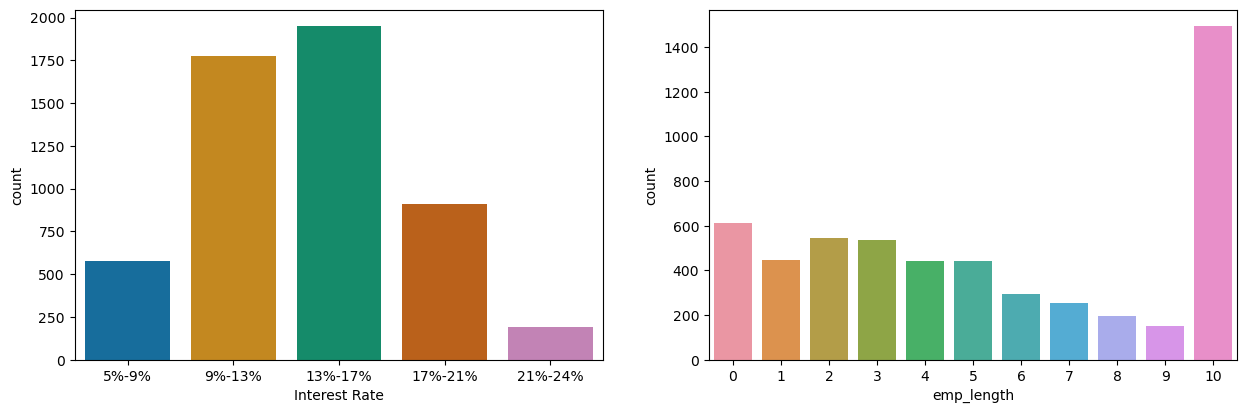

In [42]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

#### Performing similar analyses for 'open_acc,' 'revol_util,' 'total_acc,' and 'annual_inc' in conjunction with their respective bins.

<Axes: xlabel='open_acc_groups', ylabel='count'>

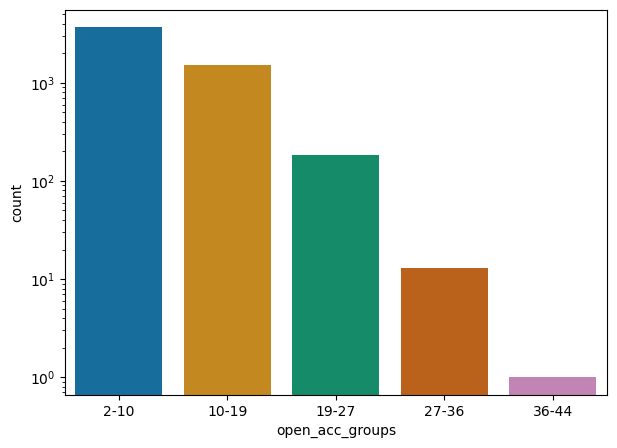

In [43]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

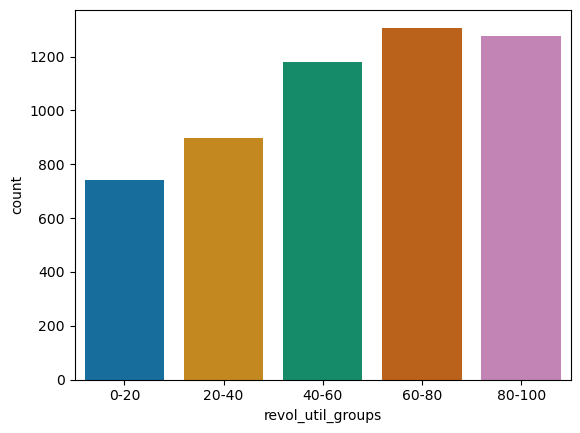

In [44]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

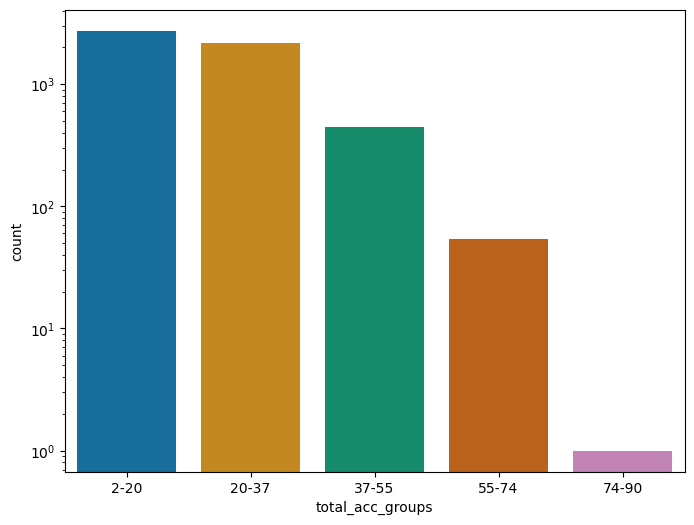

In [45]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

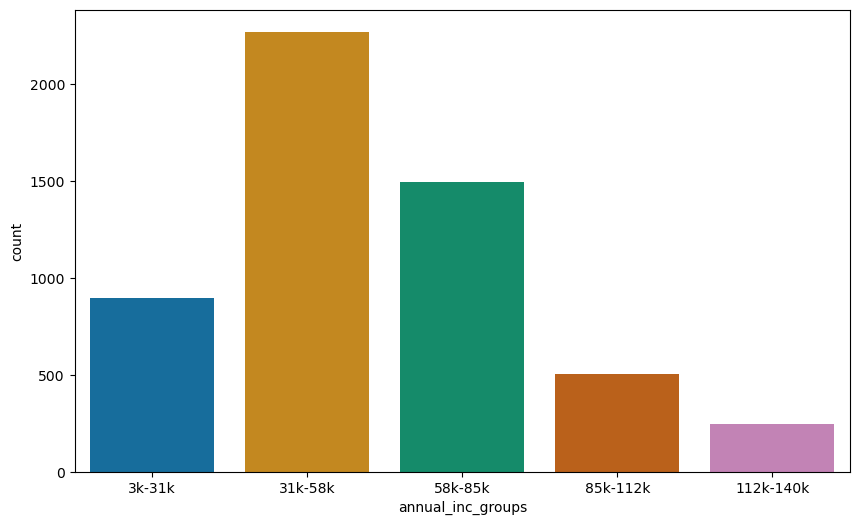

In [46]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

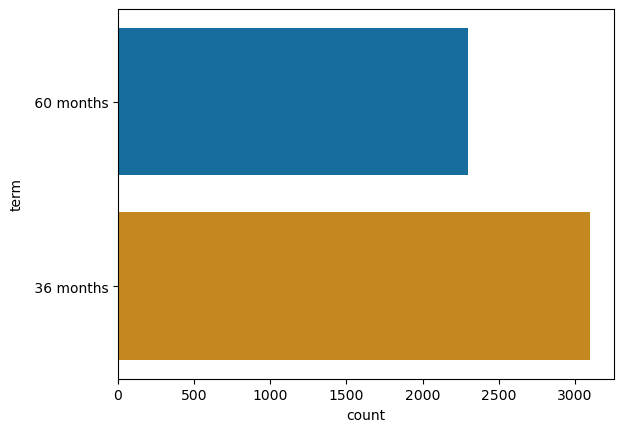

In [47]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

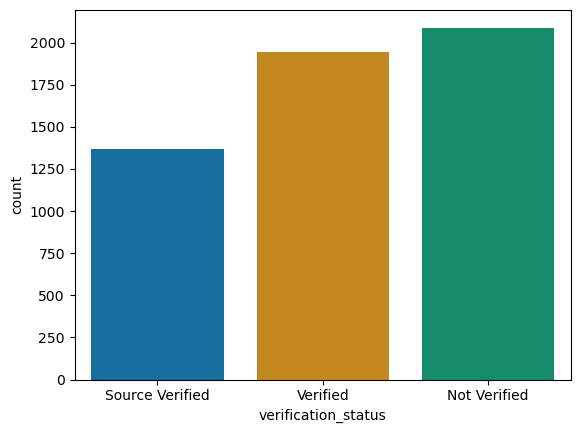

In [48]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

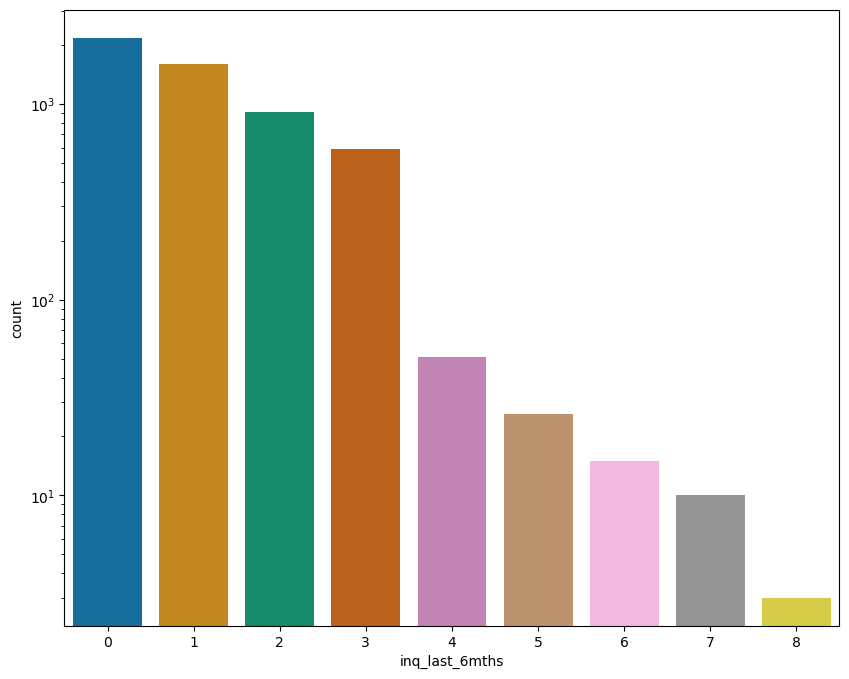

In [49]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

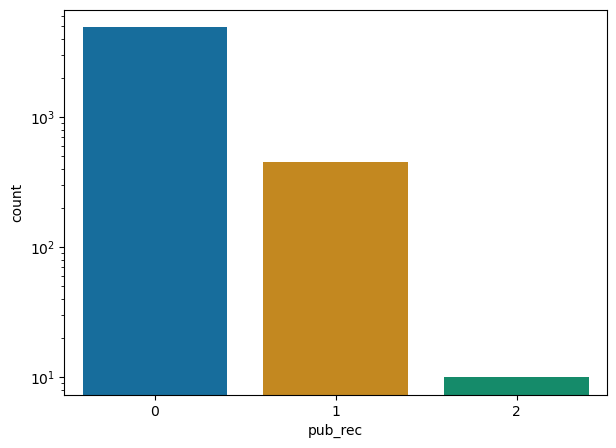

In [50]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Conducting an analysis categorized by the month and year of issuance.

In [51]:
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

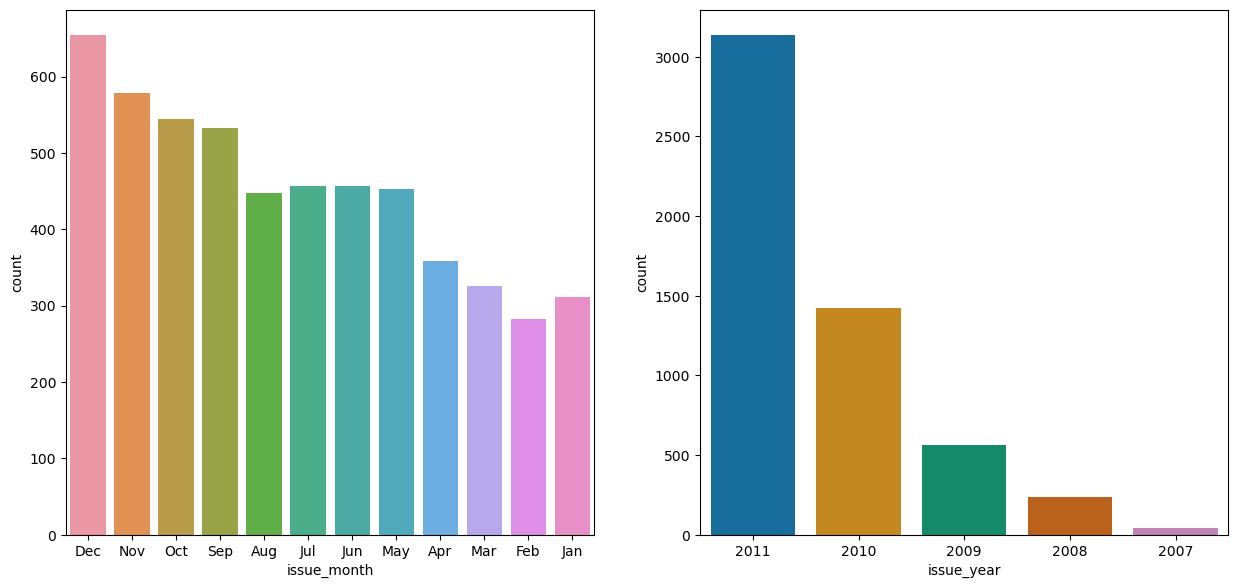

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

* #### The maximum number of defaults occurred when loans were sanctioned/issued in December.
* #### Additionally, the year 2011 saw a higher number of defaults compared to other years.

#### Analyzing the variables 'installment,' 'dti,' and 'loan_amnt' for further insights.

In [53]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

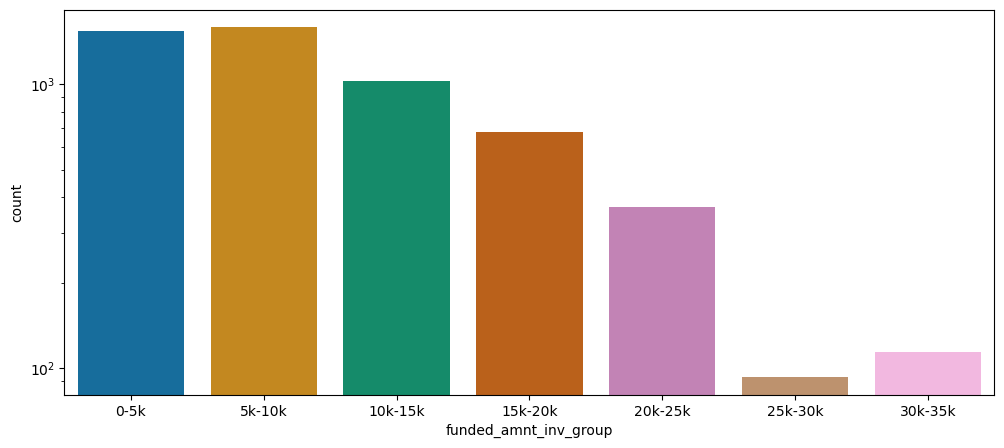

In [54]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

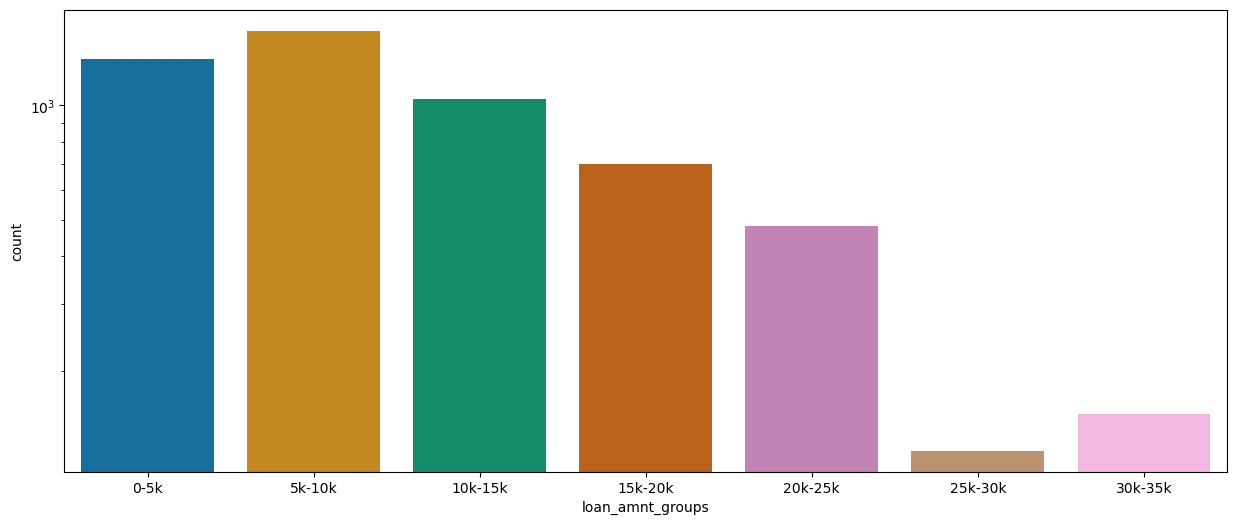

In [55]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

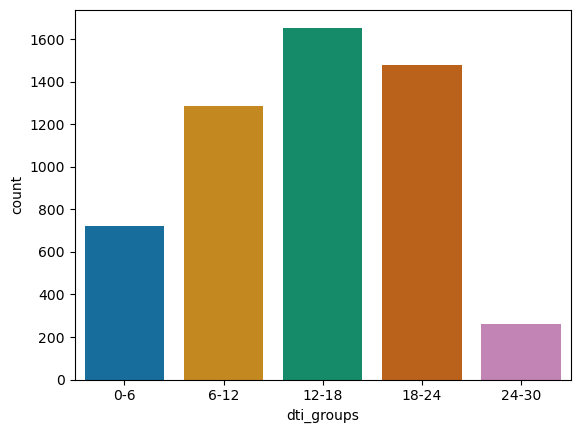

In [56]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

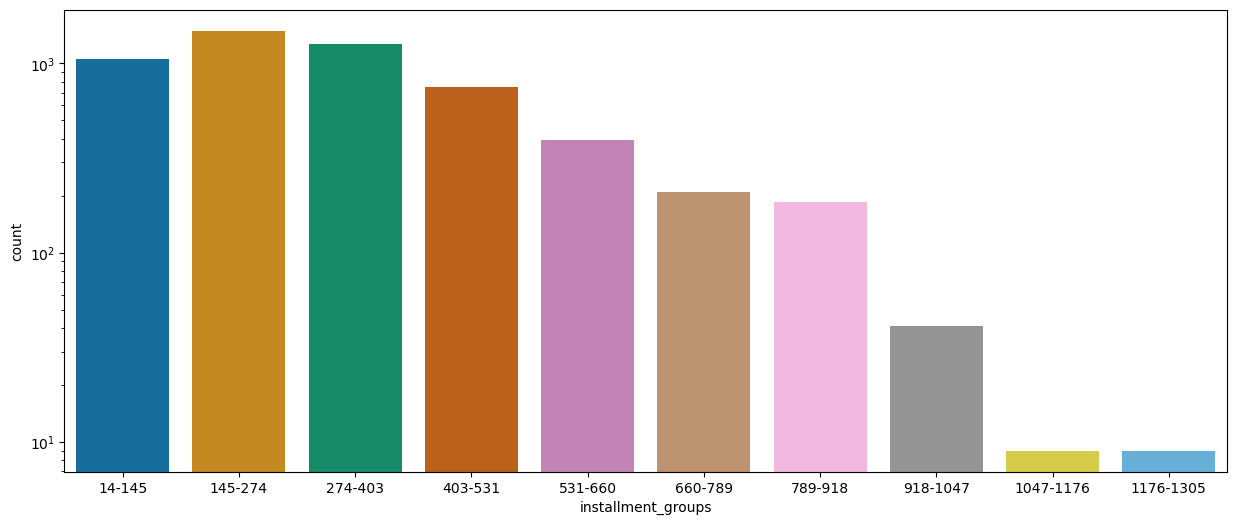

In [57]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

### Observation
##### The analysis of charged-off loans indicates a higher probability of defaulting when borrowers exhibit the following characteristics or conditions:
   * Applicants with 'RENT' as their home ownership status.
   * Borrowers using loans to consolidate other debts.
   * Interest rates falling within the 13-17% range.
   * Annual incomes in the range of 31,201 - 58,402.
   * Having 20-37 open accounts.
   * Employment length of 10 years.
   * Funded amounts by investors between 5,000 and 10,000.
   * Loan amounts ranging from 5,429 to 10,357.
   * Debt-to-income ratios (Dti) between 12-18.
   * Monthly installments in the range of 145-274.
   * Loan terms of 36 months.
   * Loan status being 'Not Verified.'
   * No recent inquiries in the last 6 months.
   * No derogatory public records.
   * Purpose of the loan is 'debt consolidation.'
   * Loan grade of 'B.'
   * Specific subgrade level of 'B5.'
##### Additionally, an interesting observation arises from the date of issuance: loans issued in the later months of the year tend to have a higher likelihood of default.
###### The increased number of loan defaults in 2011 may be linked to the financial crisis in the USA (assuming the data pertains to the United States).

### Analyzing Annual Income in Relation to Other Columns for Deeper Insights

##### Examining the relationship between annual income and loan purpose to gain insights into how income levels may affect borrowing intentions

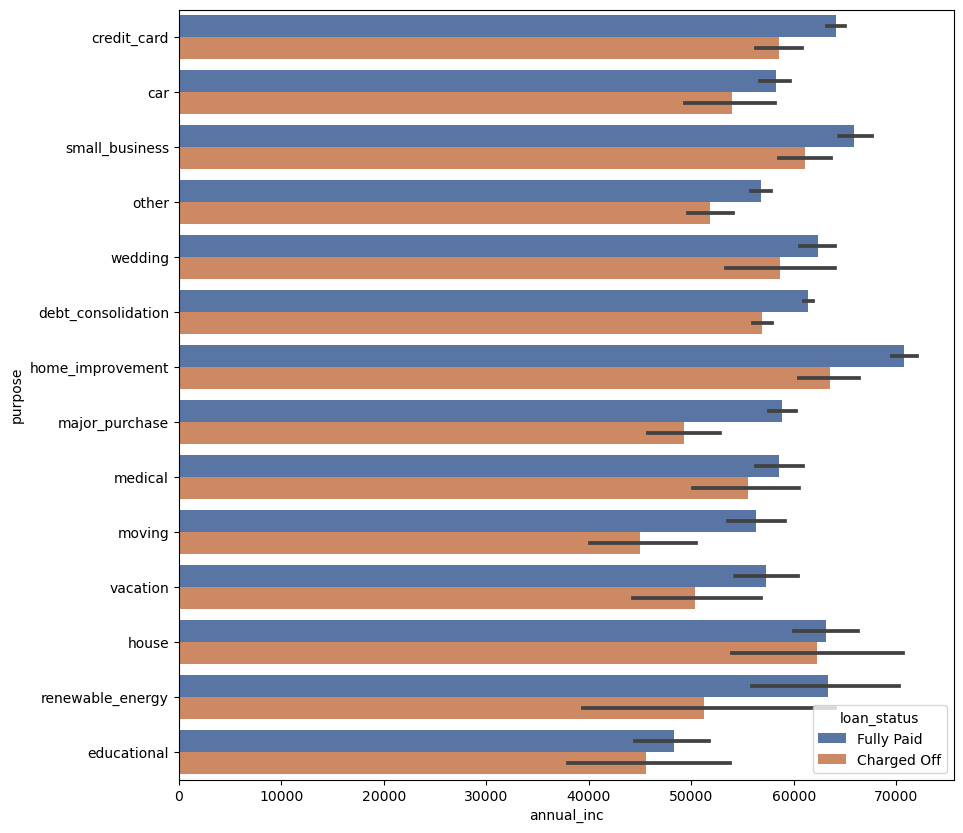

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

* #### While "debt consolidation" has the highest number of loan applications and defaults, it's not associated with the highest annual incomes.
* #### Applicants with higher salaries tend to apply for loans related to "home improvement," "house," "renewable energy," and "small businesses."

#### Exploring Home Ownership Patterns Amongst Different Income Groups

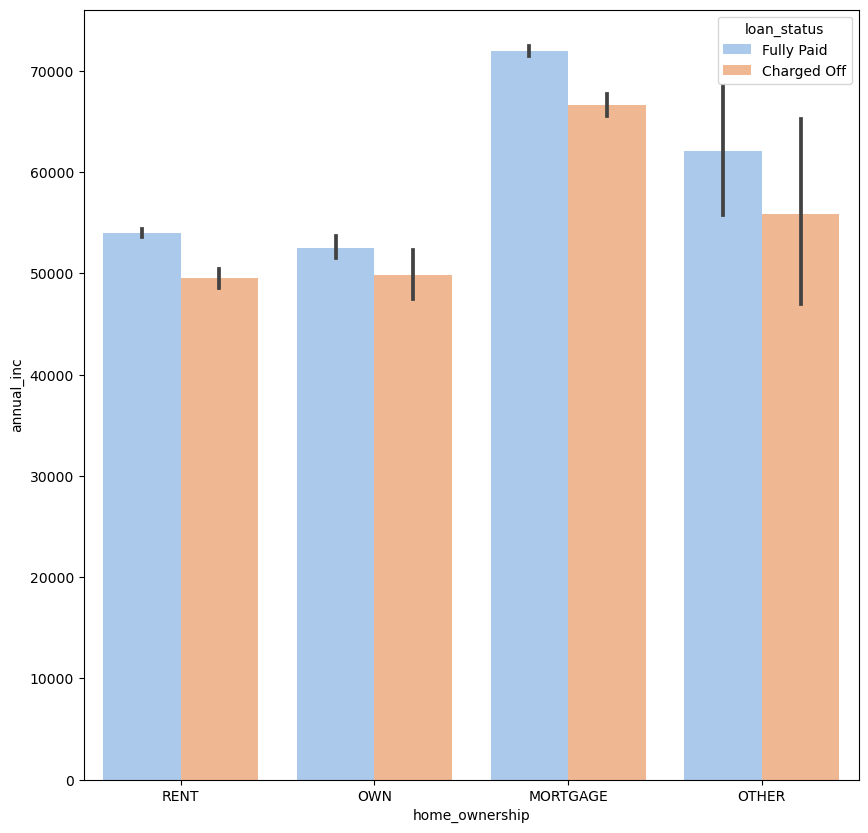

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Analyzing the Relationship Between Annual Income and Loan Amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

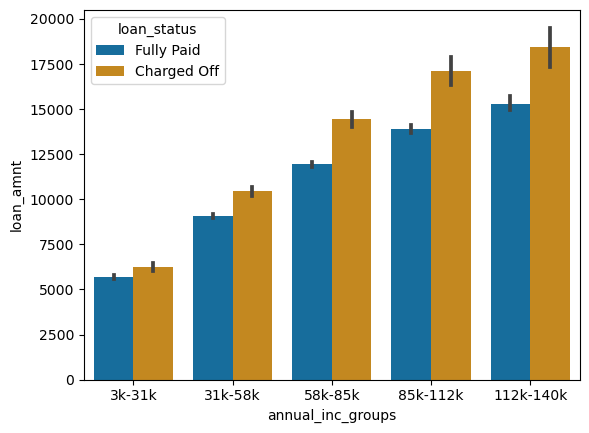

In [60]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

###### Regardless of income groups, individuals who defaulted tend to have higher loan amounts.

#### Annual income vs int_rate

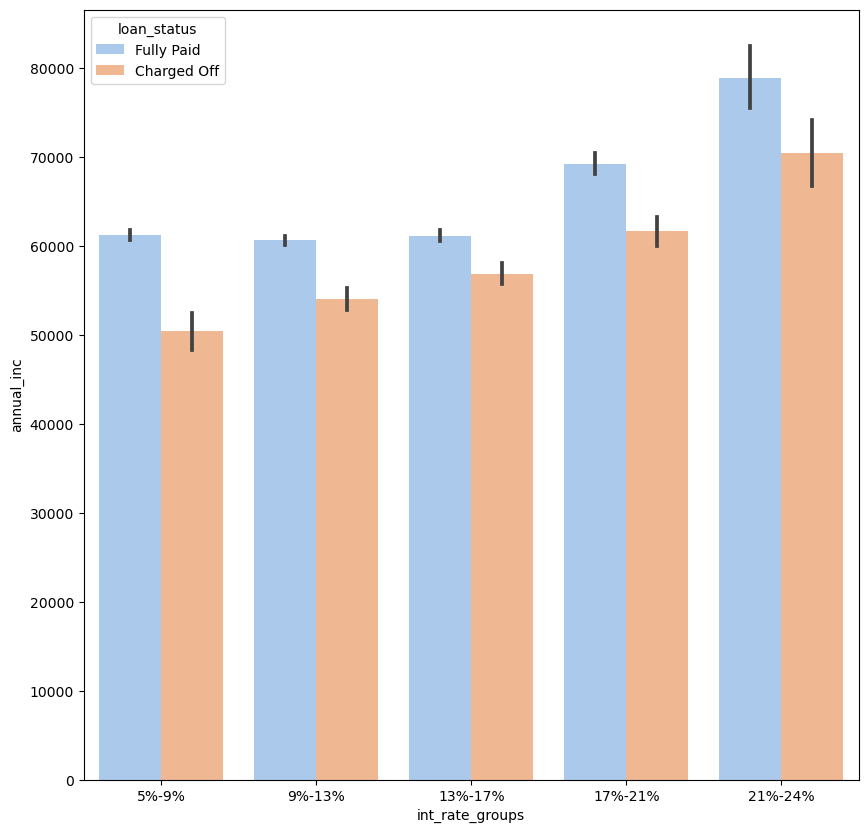

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Exploring Loan Amount in Relation to Other Columns for Deeper Insights

##### Loan Amount vs Interest Rate

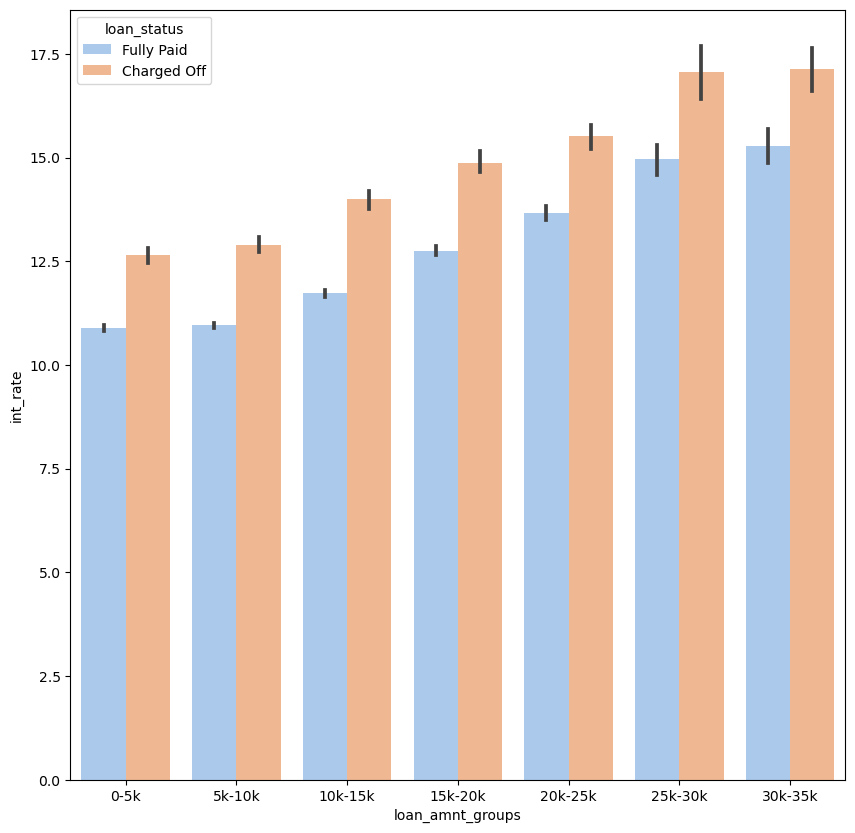

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs Loan purpose

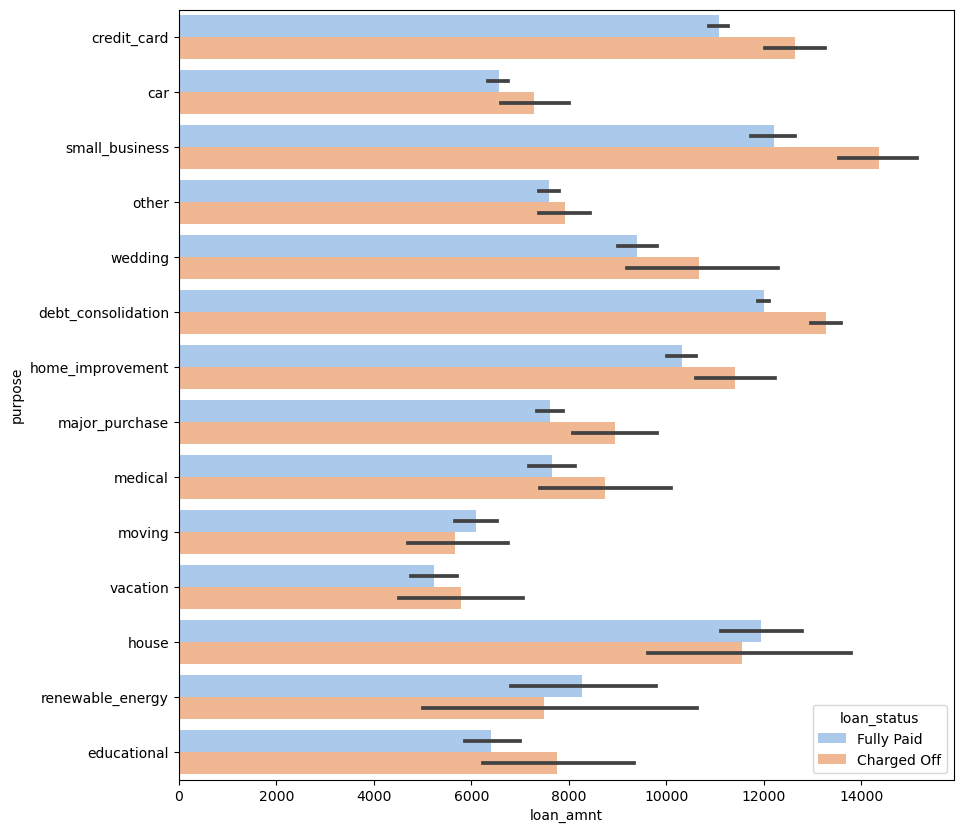

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs House Ownership

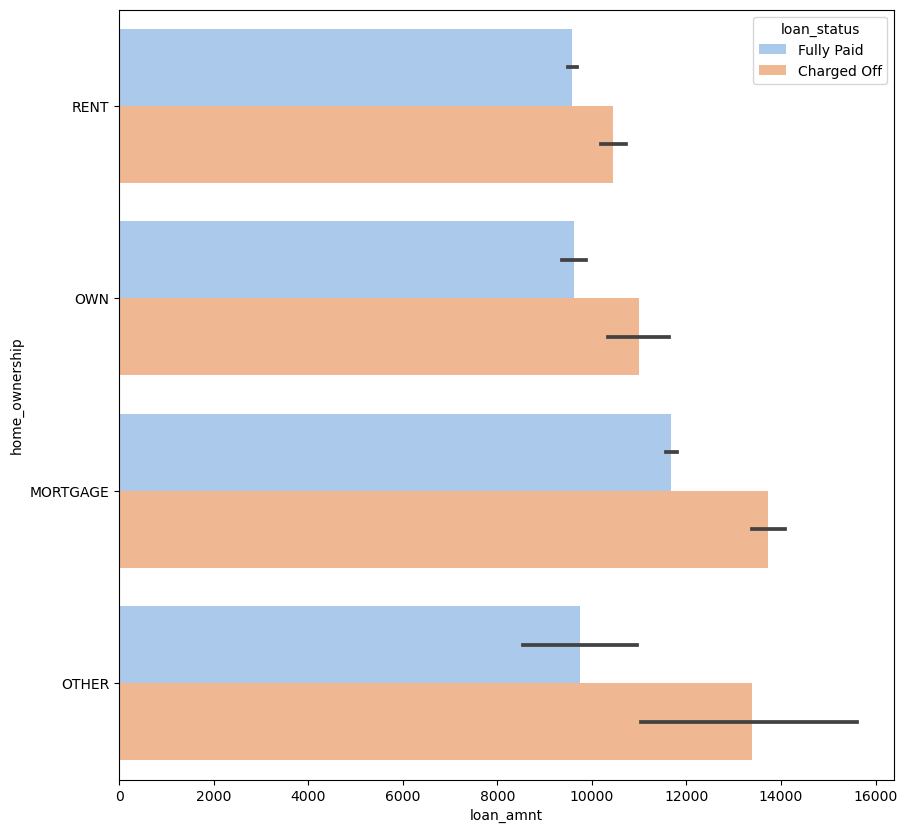

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs month issued and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

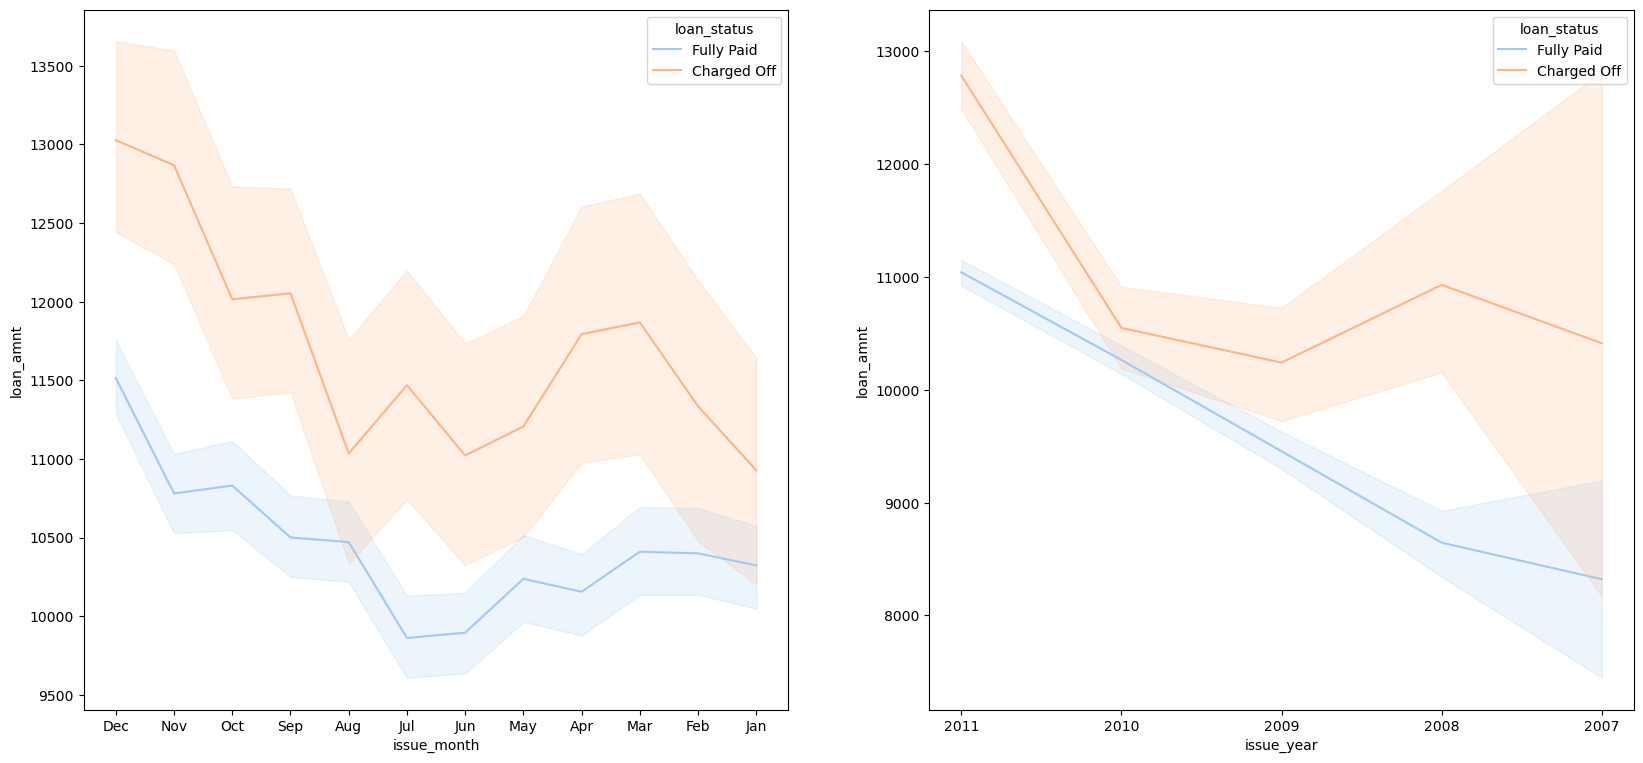

In [65]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")


#### Loan amount vs Grade

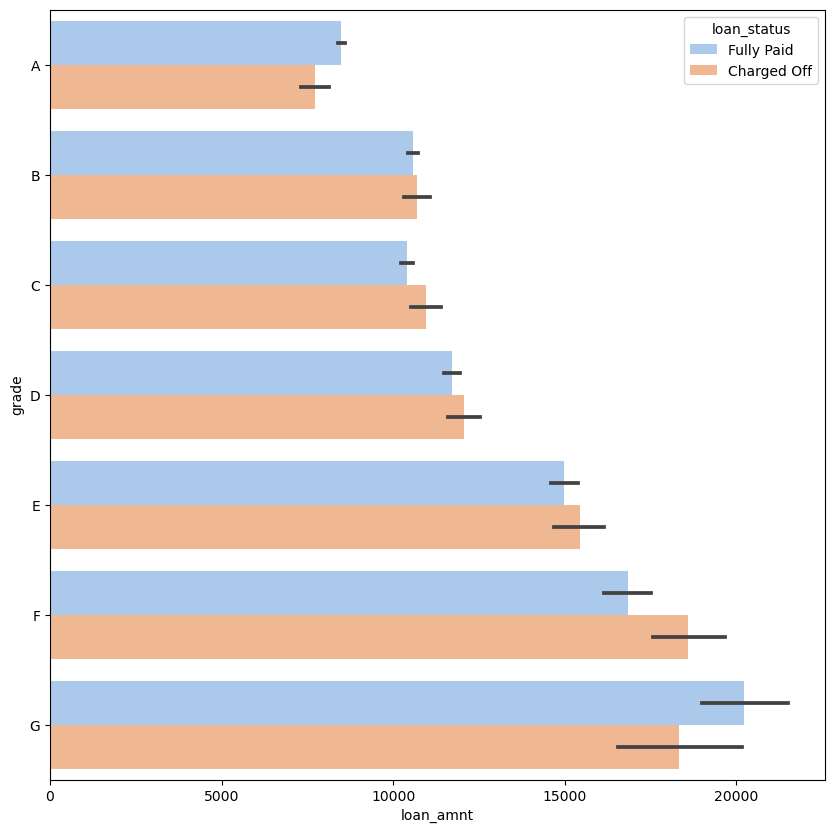

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#### Loan amount vs Employment length

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

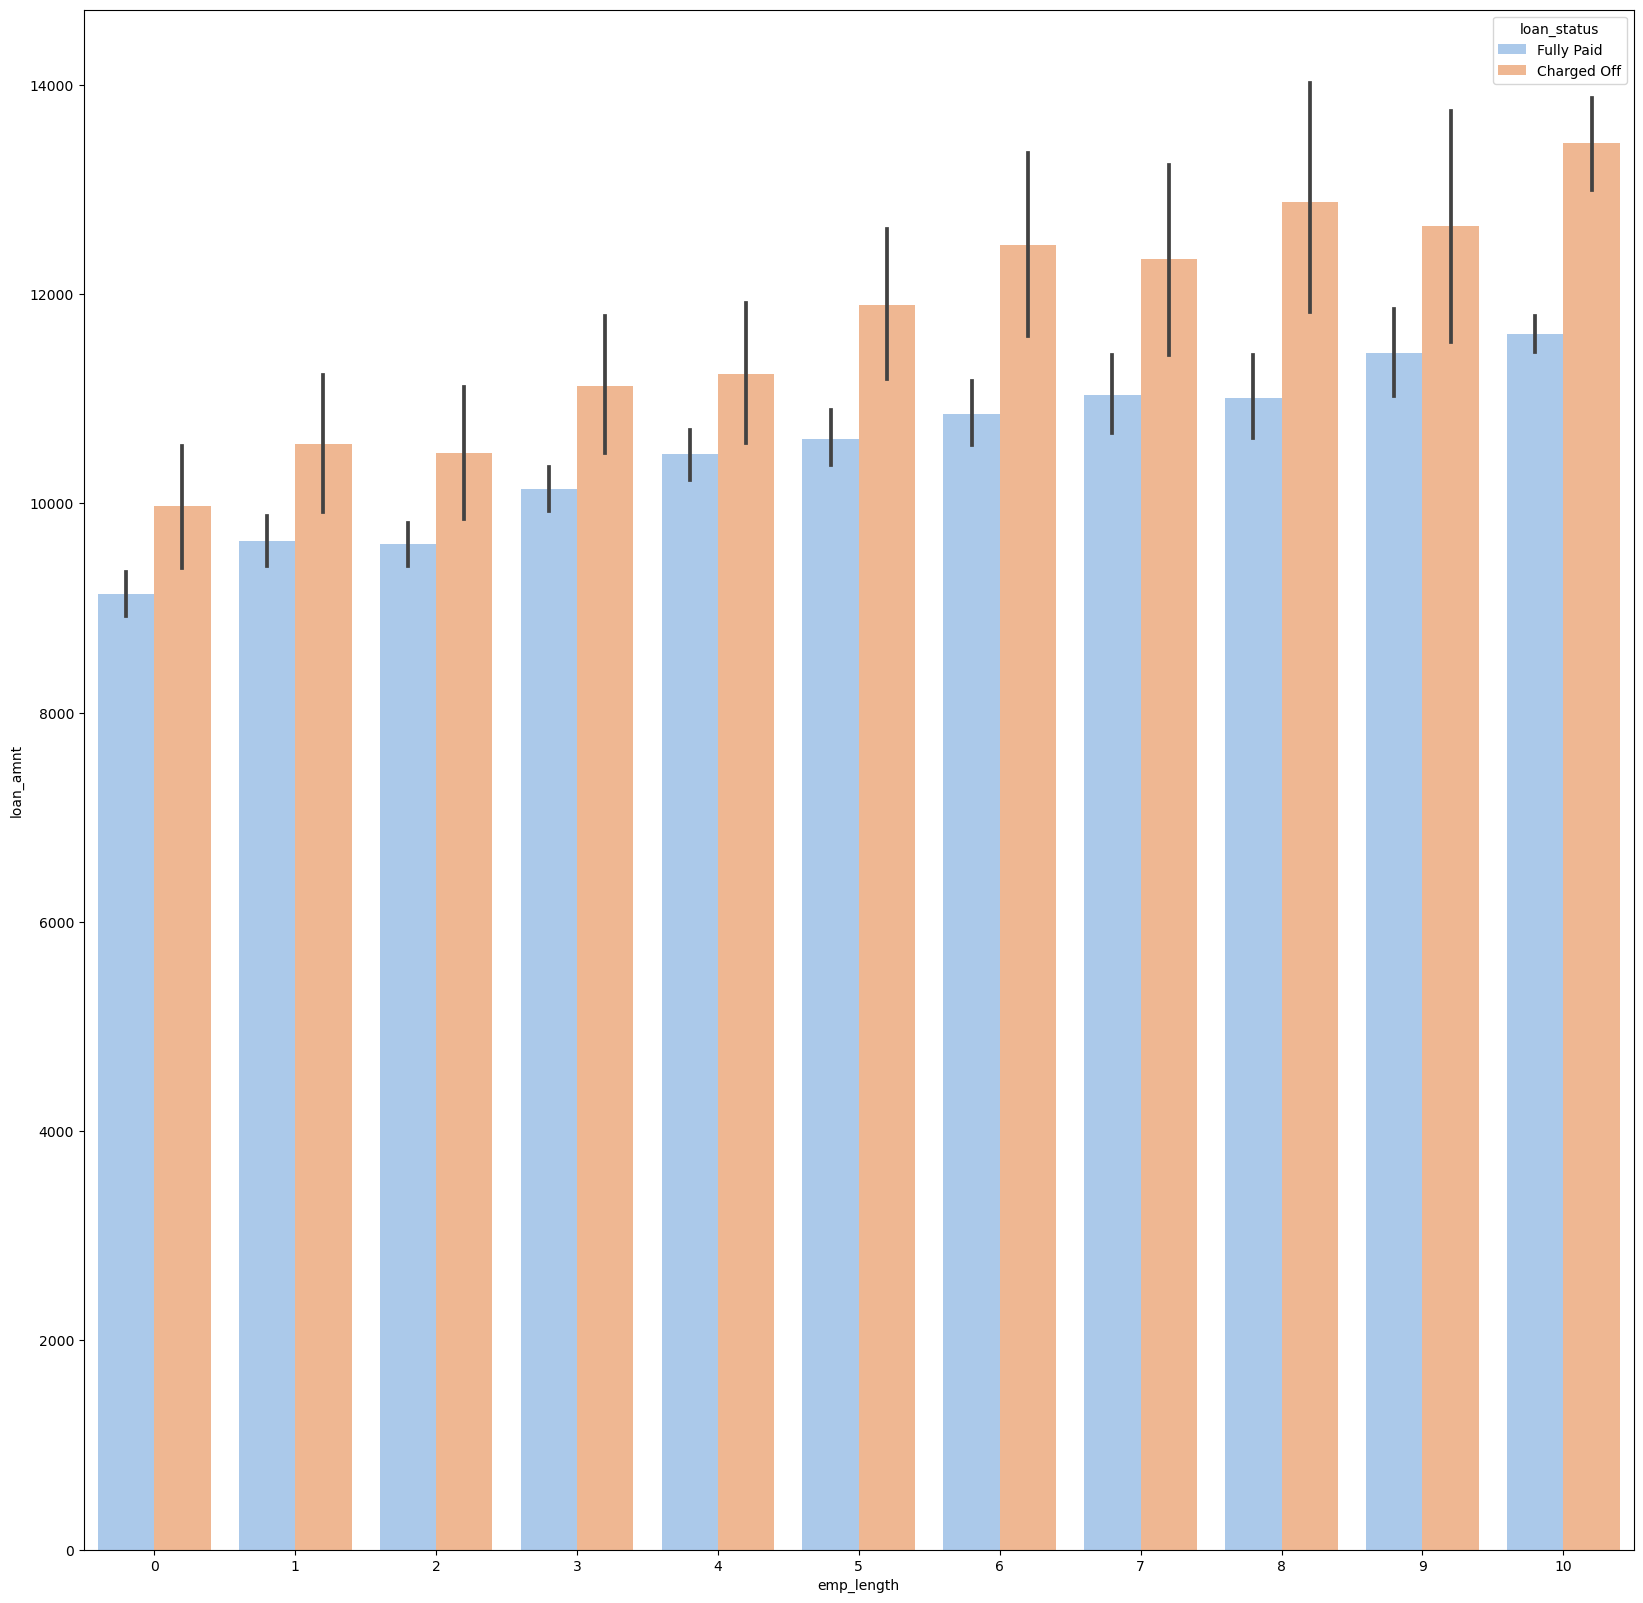

In [67]:
plt.figure(figsize=(20,20))
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")



* #### Applicants with longer employment history tend to receive higher loan approval amounts.


#### Loan amount vs Verification Status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

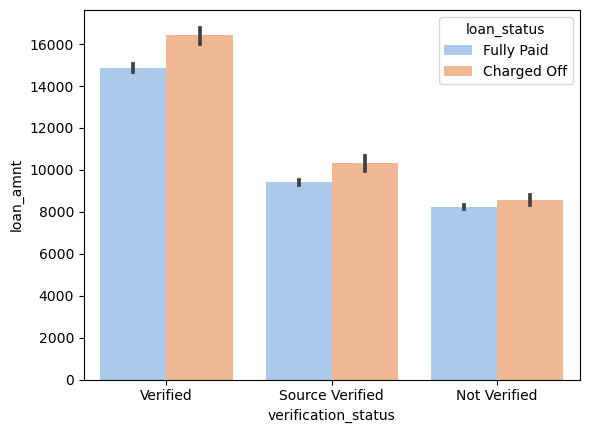

In [68]:
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

* #### When considering verification status, verified loan applications are associated with higher loan amounts, suggesting that firms may prioritize verifying loans with higher values.

#### Loan grades and corresponding interest rates

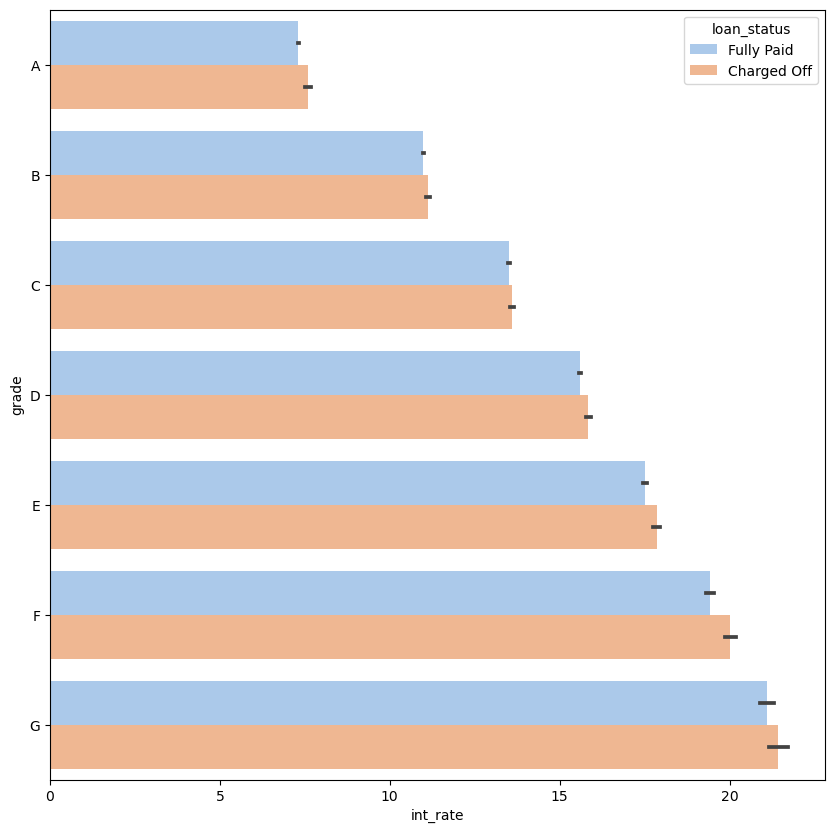

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

####  Interest Rates Across Loan Amount Groups

<Figure size 640x480 with 0 Axes>

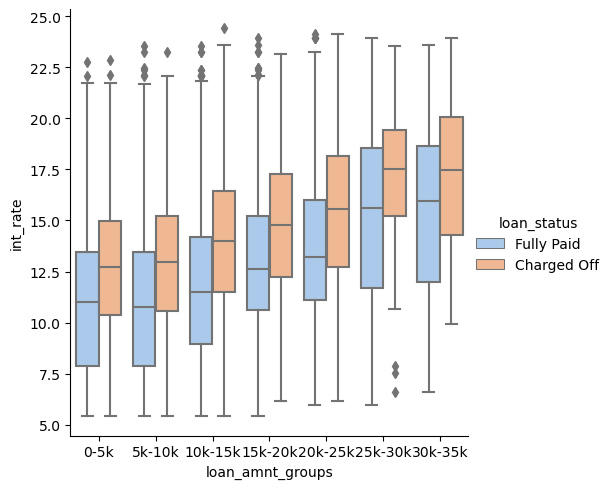

In [70]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')


* #### Interest rates for charged-off loans are consistently higher than those for fully paid loans across all loan amount groups.
* #### This disparity in interest rates can be a significant factor contributing to loan defaults.

####  Impact of Loan Term on Loan Amount

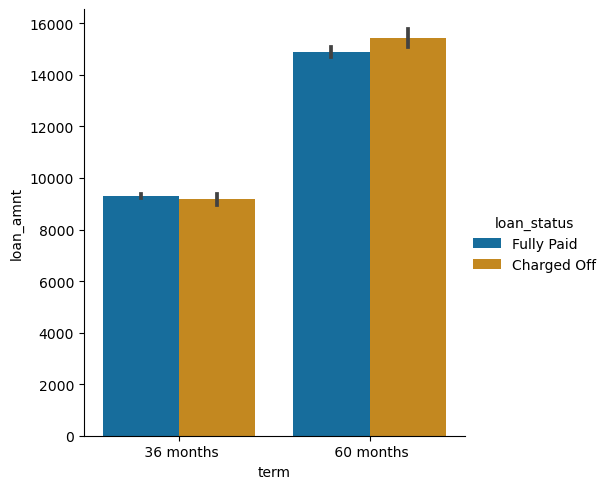

In [71]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

* #### Applicants who applied and defaulted do not exhibit significant differences in loan amounts.
* #### This suggests that applicants seeking long-term loans tend to apply for higher loan amounts.

## Key Insights into Defaulting Patterns for Charged-Off Loans
#### The analysis focusing on charged-off loans reveals a higher probability of defaulting when certain conditions are met:
* Applicants taking loans for 'home improvement' with an income in the range of 60k - 70k.
* Applicants with 'MORTGAGE' as their home ownership status and an income of 60k - 70k.
* Borrowers receiving interest rates in the range of 21-24% with an income of 70k - 80k.
* Borrowers taking loans in the range of 30k - 35k with interest rates of 15-17.5%.
* Applicants applying for loans for small businesses with loan amounts exceeding 14k.
* Applicants with 'MORTGAGE' as their home ownership status and loan amounts in the range of 14k - 16k.
* Loans graded as 'F' with loan amounts between 15k - 20k.
* Applicants with 10 years of employment history and loan amounts between 12k - 14k.
* Verified loans with loan amounts exceeding 16k.
* Loans graded as 'G' with interest rates exceeding 20%.